
### Packages



In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Loading Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving assignment3-data.csv to assignment3-data.csv


In [ ]:
import io 

#loading data
df = pd.read_csv(io.BytesIO(uploaded['assignment3-data.csv']))
df.head()

#dropping possible NA's
df = df.dropna(subset = ['phi','psi'])

#variables for shifting data
transform = 180
phi_shift = 20
psi_shift = 300

#creating new variables with shifted data
df['phi_mod'] = [(element + phi_shift + transform) % 360 for element in df['phi']]
df['psi_mod'] = [(element + psi_shift + transform) % 360 for element in df['psi']]


## Question 1

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(df.phi, df.psi)
plt.xlabel('PHI')
plt.ylabel('PSI')
plt.title('Distribution of PHI vs PSI')
plt.show()

In [ ]:
##HEATMAP
fig, ax = plt.subplots()
plt.title('Heatmap of PHI vs PSI')
sns.histplot(df,x ="phi", y = "psi")
plt.show(

## Question 4

### PRO

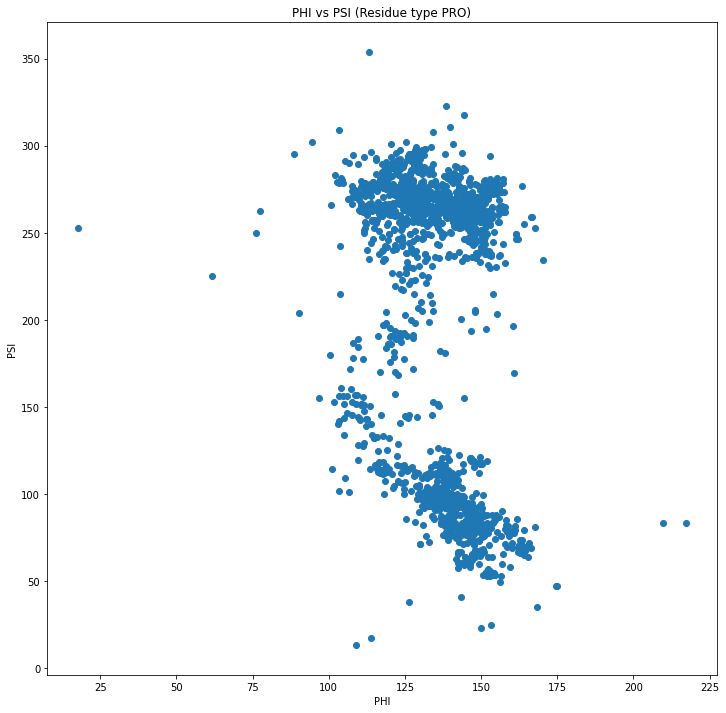

In [146]:
# Getting only observations of residue type PRO
df_PRO = df[df['residue name'] == 'PRO']

#Plotting phi and psi distributionn
plt.figure(figsize = (12,12))
plt.scatter(df_PRO.phi_mod,df_PRO.psi_mod)
plt.xlabel('PHI')
plt.ylabel('PSI')
plt.title('PHI vs PSI (Residue type PRO)')
plt.show()

#### Determining minPts and epsilon

In [ ]:

from sklearn.neighbors import NearestNeighbors

df_run = df_PRO[['phi_mod','psi_mod']]

minPts = 30

#finding n nearest (=minPts) neighbors for each point and calculating average distances
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(df_run)
distances, indices = neighbors_fit.kneighbors(df_run)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plotting result
plt.plot(distances)
plt.xlim(1400,1600)
plt.ylim(0,50)
plt.ylabel('Avg distance')
plt.title('Sorted average distances to 30 nearest neighbors')
plt.show()

# from the plot it look like epsilon should be around 15

#### Running DBSCAN

In [ ]:
# Set parameters for DBSCAN
eps = 15
minPts = 30

# running DBSCAN
dbscan = DBSCAN(eps = eps,min_samples=minPts,metric = 'euclidean')
dbscan.fit(df_run)

# extracting clustering results
labels = dbscan.labels_

# adding clustering labels as a column in our dataset
df_run['labels'] = labels

# nr of clusters obtained
nr_of_clusters = len(np.unique(labels))-1

# nr of outliers 
nr_of_outliers = np.sum(labels == -1)

In [ ]:
# Plotting result of DBSCAN
outliers = df_run[df_run['labels'] == -1]
cluster_1 = df_run[df_run['labels'] == 0]
cluster_2 = df_run[df_run['labels'] == 1]
cluster_3 = df_run[df_run['labels']==2]
plt.figure(figsize = (12,12))
plt.scatter(outliers.phi_mod,outliers.psi_mod, c = 'black')
plt.scatter(cluster_1.phi_mod,cluster_1.psi_mod, c = 'red')
plt.scatter(cluster_2.phi_mod,cluster_2.psi_mod, c = 'green')
plt.scatter(cluster_3.phi_mod,cluster_3.psi_mod, c = 'blue')
plt.xlabel('PHI')
plt.ylabel('PSI')
plt.title('DBSCAN(minPts = 100,eps = 15), residue type PRO')
plt.show()

### GLY

In [ ]:
# Data with observations of residue type GLY
df_GLY = df[df['residue name'] == 'GLY']

# Plotting data
plt.figure(figsize = (12,12))
plt.scatter(df_GLY.phi_mod,df_GLY.psi_mod)
plt.xlabel('PHI')
plt.ylabel('PSI')
plt.title('PHI vs PSI (residue type GLY)')
plt.show()

#### Determining minPts and epsilon

In [ ]:
df_gly_run = df_GLY[['phi_mod','psi_mod']]

minPts = 30

# finding n nearest neighbors for each point and calcultaing distances
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(df_gly_run)
distances, indices = neighbors_fit.kneighbors(df_gly_run)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

#plotting result
plt.plot(distances)
plt.xlim(2000,2200)
plt.ylim(0,30)
plt.ylabel('Distance')
plt.title('Sorted average distance to 30 nearest neighbors ')

#from the plot it look like epsilon should be around 15

#### Running DBSCAN

In [ ]:
eps = 15
minPts = 30

dbscan = DBSCAN(eps = eps,min_samples=minPts,metric = 'euclidean')
dbscan.fit(df_gly_run)

labels = dbscan.labels_

df_gly_run['labels'] = labels


nr_of_clusters = len(np.unique(labels))-1
nr_of_outliers = np.sum(labels == -1)



In [ ]:
# plotting results of DBSCAN on residue type GLY
outliers = df_gly_run[df_gly_run['labels'] == -1]
cluster_1 = df_gly_run[df_gly_run['labels'] == 0]
cluster_2 = df_gly_run[df_gly_run['labels'] == 1]
cluster_3 = df_gly_run[df_gly_run['labels'] == 2]
cluster_4 = df_gly_run[df_gly_run['labels'] == 3]
cluster_5 = df_gly_run[df_gly_run['labels'] == 4]
cluster_6 = df_gly_run[df_gly_run['labels'] == 5]


plt.figure(figsize = (12,12))
plt.scatter(outliers.phi_mod,outliers.psi_mod, c = 'black')
plt.scatter(cluster_1.phi_mod,cluster_1.psi_mod, c = 'red')
plt.scatter(cluster_2.phi_mod,cluster_2.psi_mod, c = 'green')
plt.scatter(cluster_3.phi_mod,cluster_3.psi_mod, c = 'blue')
plt.scatter(cluster_4.phi_mod,cluster_4.psi_mod, c = 'yellow')
plt.scatter(cluster_5.phi_mod,cluster_5.psi_mod, c = 'orange')
plt.scatter(cluster_6.phi_mod,cluster_6.psi_mod, c = 'purple')


plt.xlabel('PHI')
plt.ylabel('PSI')
plt.title('DBSCAN(minPts = 30,eps = 15), residue type GLY')
plt.show()

